In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,r2_score
import seaborn as sns

In [ ]:
!ls -lha kaggle.json
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json
!pwd
!kaggle datasets download -d jcprogjava/handwritten-digits-dataset-not-in-mnist
!unzip handwritten-digits-dataset-not-in-mnist.zip

Streaming output truncated to the last 5000 lines.
  inflating: dataset/9/9/5499.png    
  inflating: dataset/9/9/55.png      
  inflating: dataset/9/9/550.png     
  inflating: dataset/9/9/5500.png    
  inflating: dataset/9/9/5501.png    
  inflating: dataset/9/9/5502.png    
  inflating: dataset/9/9/5503.png    
  inflating: dataset/9/9/5504.png    
  inflating: dataset/9/9/5505.png    
  inflating: dataset/9/9/5506.png    
  inflating: dataset/9/9/5507.png    
  inflating: dataset/9/9/5508.png    
  inflating: dataset/9/9/5509.png    
  inflating: dataset/9/9/551.png     
  inflating: dataset/9/9/5510.png    
  inflating: dataset/9/9/5511.png    
  inflating: dataset/9/9/5512.png    
  inflating: dataset/9/9/5513.png    
  inflating: dataset/9/9/5514.png    
  inflating: dataset/9/9/5515.png    
  inflating: dataset/9/9/5516.png    
  inflating: dataset/9/9/5517.png    
  inflating: dataset/9/9/5518.png    
  inflating: dataset/9/9/5519.png    
  inflating: dataset/9/9/552.png     

In [ ]:
data = pd.DataFrame()

for digit in range(10):
  for folder in range(10):
    for file in range(1000):
      try:
        file_path = f'/content/dataset/{digit}/{folder}/{10000 + file}.png'
        image = Image.open(file_path)
        image_array = np.array(image).flatten()
        temp_df = pd.DataFrame(image_array.reshape(1, -1))
        temp_df['label'] = digit
        data = pd.concat([data, temp_df], ignore_index=True)
      except FileNotFoundError:
        pass


In [ ]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,3127,3128,3129,3130,3131,3132,3133,3134,3135,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
x=data.drop(["label"],axis="columns")
y=data["label"]
y.head()

,label
0,0
1,0
2,0
3,0
4,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [ ]:
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(X_train)
x_test_scaled=scaler.transform(X_test)
accuracy = accuracy_score(y_test, y_pred)
s=r2_score(y_test, y_pred)
print("Accuracy: %", (round(accuracy*100,2)))

Accuracy: % 94.76
R2 score: % 89.81


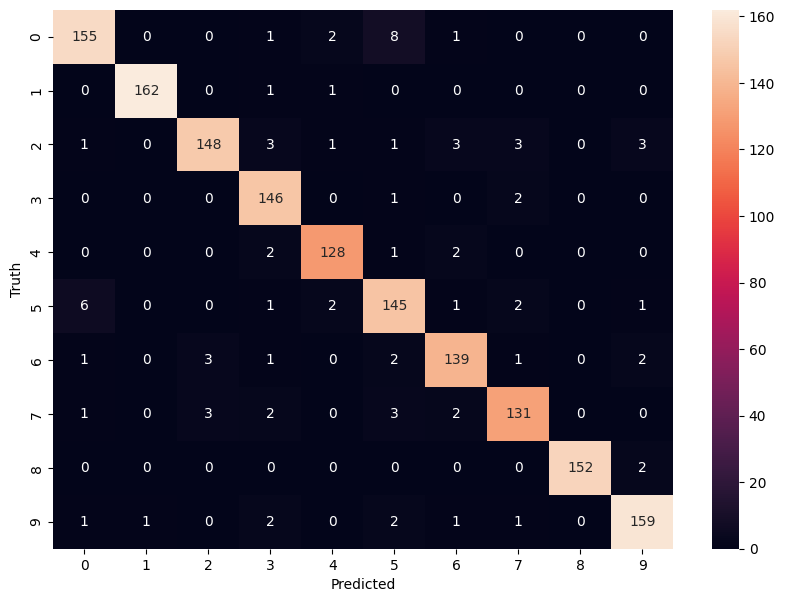

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()


In [ ]:
report = classification_report(y_test, y_pred, output_dict=True)
round(pd.DataFrame(report).transpose(),3)

,precision,recall,f1-score,support
0,0.939,0.928,0.934,167.000
1,0.994,0.988,0.991,164.000
2,0.961,0.908,0.934,163.000
3,0.918,0.980,0.948,149.000
4,0.955,0.962,0.959,133.000
5,0.890,0.918,0.903,158.000
6,0.933,0.933,0.933,149.000
7,0.936,0.923,0.929,142.000
8,1.000,0.987,0.993,154.000
9,0.952,0.952,0.952,167.000


In [ ]:
X_train.shape


NameError: name 'X_train' is not defined